Пора без каких - либо условий

In [51]:
import sys
import os
sys.path.append('/home/tpopova/prj/PB_SCF')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from py_utils.generate_pore_in_files import generate_pore_in_files

In [52]:
N = 400
S = 150
Cs = 0.001
alpha = 0.5
D = np.linspace(220, 100, num = 6)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.781017e+00 |g| = 8.630214e+00 alpha = 1.000000e+00 
hessian scaling: 3.252
it =  1  E = 2.417523e+00 |g| = 7.173781e+00 alpha = 1.115872e-01 
it =  2  E = 1.634453e+00 |g| = 7.057253e+00 alpha = 2.263365e-01 
it =  3  E = 4.978023e+00 |g| = 6.651413e+00 alpha = 2.128323e-02 
it =  4  E = 2.513115e+00 |g| = 6.630593e+00 alpha = 7.768306e-02 
it =  5  E = 8.920122e+00 |g| = 6.298644e+00 alpha = 5.473570e-03 
it =  6  E = 2.386410e+00 |g| = 6.401610e+00 alpha = 7.318009e-02 
it =  7  E = 4.452286e+00 |g| = 6.703781e+00 alpha = 2.343942e-02 
it =  8  E = 2.974536e+00 |g| = 6.892301e+00 alpha = 5.089881e-02 
it =  9  E = 4.436414e+00 |g| = 7.096252e+00 alpha = 2.505149e-02 
it =  10  E = 4.425056e+00 |g| = 7.186727e+00 a

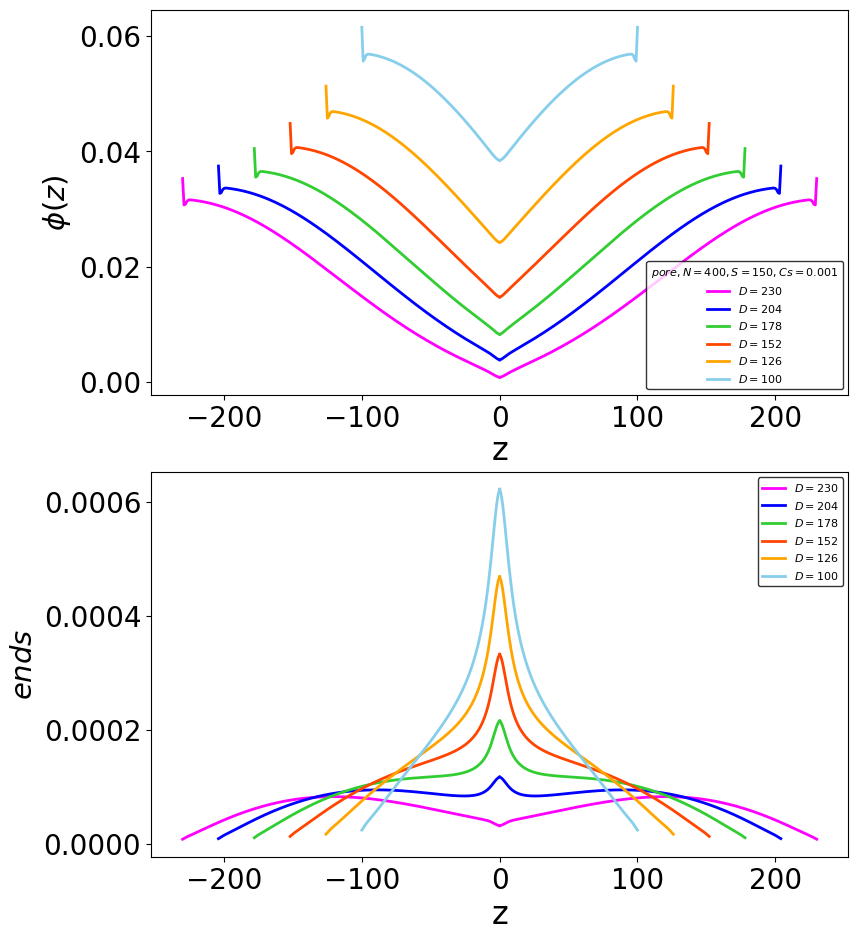

In [53]:
colors = ['fuchsia', 'blue', 'limegreen', 'orangered', 'orange', 'skyblue', 'slateblue', 'black', 'hotpink',
              'crimson', 'aquamarine']

fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for d, color in zip(D, colors):
    file_name_pro_pore = generate_pore_in_files(template_pore = '/home/tpopova/prj/PB_SCF/pore_templates/pore_template.in',
                   
                   #название параметра
                   range_param = 'D',

                   N_brush = N,
                   S = S,
                   Cs = Cs,
                   alpha = alpha,
                   D = round(d),
                   min_range_value = 1,
                   max_range_value = 1,
                    )

    c_polymer_pore = np.asarray(pd.read_csv(file_name_pro_pore, sep='\t')['mol_pol_phi'])

    ends_pore = np.asarray(pd.read_csv(file_name_pro_pore, sep='\t')['mon_E_phi'])
    
    r_range = np.linspace(0, round(d), num = round(d))
    
        
    ax1.plot(r_range, c_polymer_pore,
                linestyle='-',
                linewidth= 2,
                color=color,
                label=f'$D = {round(d)}$')
    
    ax1.plot(-1 * r_range, c_polymer_pore,
                linestyle='-',
                linewidth= 2,
                color=color)
    
    ax2.plot(r_range, ends_pore,
            linestyle='-',
            linewidth= 2,
            color=color,
            label=f'$D = {round(d)}$')
    
    ax2.plot(-1 * r_range, ends_pore,
            linestyle='-',
            linewidth= 2,
            color=color)

#  Добавляем подписи к осям:
ax1.set_xlabel('z',
                fontsize=23,  
                color='black', labelpad=2.5) 

ax1.set_ylabel(r'$\phi(z)$',
                fontsize=21, 
                color='black')
ax2.set_xlabel('z',
                fontsize=23, 
                color='black') 

ax2.set_ylabel('$ends$',
                fontsize=21,
                color='black') 

# legend
ax1.legend(title = f'$pore, N = {N}, S = {S}, Cs = {Cs}$',
    fontsize=8,
            ncol=1,  # количество столбцов
            facecolor='white',  # цвет области
            edgecolor='black',  # цвет крайней линии
            title_fontsize='8',  # размер шрифта заголовка
            loc = 'lower right')
# legend
ax2.legend(fontsize=8,
            ncol=1,  # количество столбцов
            facecolor='white',  # цвет области
            edgecolor='black',  # цвет крайней линии   #  заголовок
            title_fontsize='8', loc = 'upper right'  # размер шрифта заголовка
            )

fig.set_figwidth(9)
fig.set_figheight(11)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.show()

In [54]:
ends_pore

array([6.22716942e-04, 6.14363508e-04, 5.98801132e-04, 5.77957456e-04,
       5.54011063e-04, 5.28924401e-04, 5.04179758e-04, 4.80723072e-04,
       4.59042281e-04, 4.39297422e-04, 4.21446427e-04, 4.05341779e-04,
       3.90794219e-04, 3.77609607e-04, 3.65607348e-04, 3.54627673e-04,
       3.44532915e-04, 3.35205952e-04, 3.26547604e-04, 3.18473886e-04,
       3.10913494e-04, 3.03805652e-04, 2.97098324e-04, 2.90746741e-04,
       2.84712200e-04, 2.78961089e-04, 2.73464081e-04, 2.68195481e-04,
       2.63132682e-04, 2.58255719e-04, 2.53546889e-04, 2.48990445e-04,
       2.44572330e-04, 2.40279952e-04, 2.36102003e-04, 2.32028292e-04,
       2.28049612e-04, 2.24157626e-04, 2.20344757e-04, 2.16604113e-04,
       2.12929399e-04, 2.09314863e-04, 2.05755228e-04, 2.02245652e-04,
       1.98781674e-04, 1.95359184e-04, 1.91974382e-04, 1.88623751e-04,
       1.85304031e-04, 1.82012193e-04, 1.78745418e-04, 1.75501077e-04,
       1.72276719e-04, 1.69070050e-04, 1.65878923e-04, 1.62701325e-04,
      

In [55]:
f = (ends_pore[-1] - ends_pore[-2])/(r_range[-1] - r_range[-2])
print(f)


-3.4292286817338133e-06
